# Download RGI glacier shapefiles and plot those that are in our RoI

In [24]:
import geopandas as gpd
import os

In [25]:
data_dir = "rgi_data"

In [26]:
!mkdir -p $data_dir
%cd $data_dir
if not os.path.exists('02_rgi60_WesternCanadaUS.zip'):
    !wget -O 02_rgi60_WesternCanadaUS.zip https://www.glims.org/RGI/rgi60_files/02_rgi60_WesternCanadaUS.zip
    !unzip 02_rgi60_WesternCanadaUS.zip
%cd ..

/home/jovyan/glacier-thickness-from-sar/import_data/glacier_shapefile/rgi_data
/home/jovyan/glacier-thickness-from-sar/import_data/glacier_shapefile


In [27]:
# rgi60_gdf = gpd.read_file("shapefiles/02_rgi60_WesternCanadaUS.shp")
rgi60_gdf = gpd.read_file(f"{data_dir}/02_rgi60_WesternCanadaUS.shp")
scg_box = gpd.read_file('emmons_glacier_roi.geojson')

<AxesSubplot:>

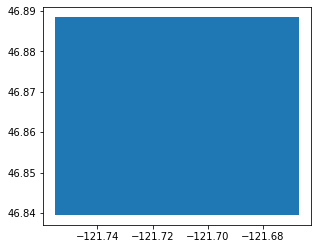

In [28]:
scg_box.plot()

In [29]:
scg_box.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
rgi60_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

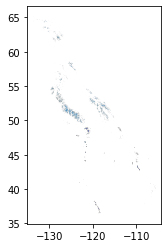

In [31]:
rgi60_gdf.plot()

In [32]:
# wa_rgi60_gdf = rgi60_gdf[rgi60_gdf.within(rainier_box)].copy()
rgi60_gdf = rgi60_gdf[rgi60_gdf.intersects(scg_box.loc[0, 'geometry'])]

<AxesSubplot:>

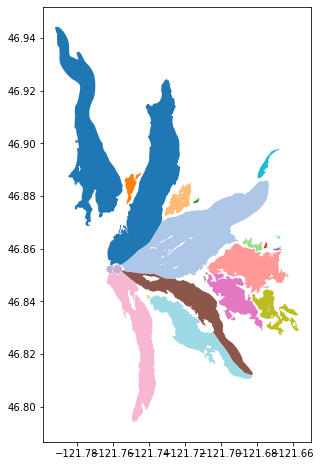

In [33]:
rgi60_gdf.plot(figsize=(8,8),cmap='tab20')

<AxesSubplot:>

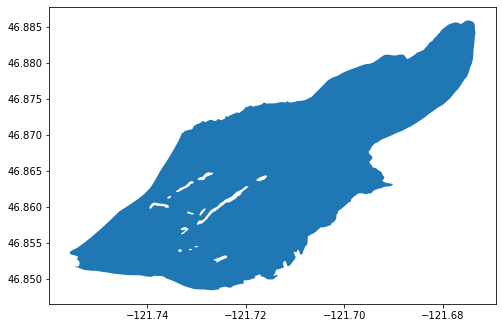

In [34]:
rgi60_gdf[rgi60_gdf['Name']=='Emmons Glacier WA'].plot(figsize=(8,8),cmap='tab20')

In [36]:
scg_gdf = rgi60_gdf[rgi60_gdf['Name']=='Emmons Glacier WA']

In [37]:
scg_gdf

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Aspect,Lmax,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry
14296,RGI60-02.14297,G238286E46865N,19709999,19949999,-121.71401,46.86478,2,4,10.594,1605,...,56,7663,0,0,0,0,0,1,Emmons Glacier WA,"POLYGON ((-121.67828 46.87530, -121.67866 46.8..."


In [38]:
scg_proj = scg_gdf.to_crs('EPSG:32610')
scg_proj.to_file("emmons_glacier.geojson", driver='GeoJSON')